# UCI Adult Income Dataset - Exploratory and Descriptive Analysis
This notebook is focused on the exploratory and descriptive analysis of the cleaned version of the UCI Adult income Dataset

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

## Define and create Paths

In [4]:
# get working directory 
Current_dir = os.getcwd()
# on one directory up to the root directory 
project_root_dir = os.path.dirname(Current_dir)
# define paths to the data folders
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define paths to result folder 
results_dir = os.path.join(project_root_dir,'results')
# define paths to docs folder 
docs_dir = os.path.join(project_root_dir,'docs')

# create directories if they do not eFileExists 
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [6]:
adult_data_filename = os.path.join(processed_dir,'adult_cleaned.csv')
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north_america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north_america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north_america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north_america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central_america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north_america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central_america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north_america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north_america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north_america,36-45


In [7]:
adult_df.shape

(32513, 16)

In [8]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnwgt               32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary statistics
### Numerical variables

In [10]:
adult_df.describe()

,age,fnwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Categorical Variables

In [12]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north_america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [13]:
adult_df['workclass'].value_counts()

workclass
private          22650
government        4350
self-employed     3656
unknown           1836
voluntary           14
unemployed           7
Name: count, dtype: int64

In [14]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [15]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [16]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [17]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [19]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


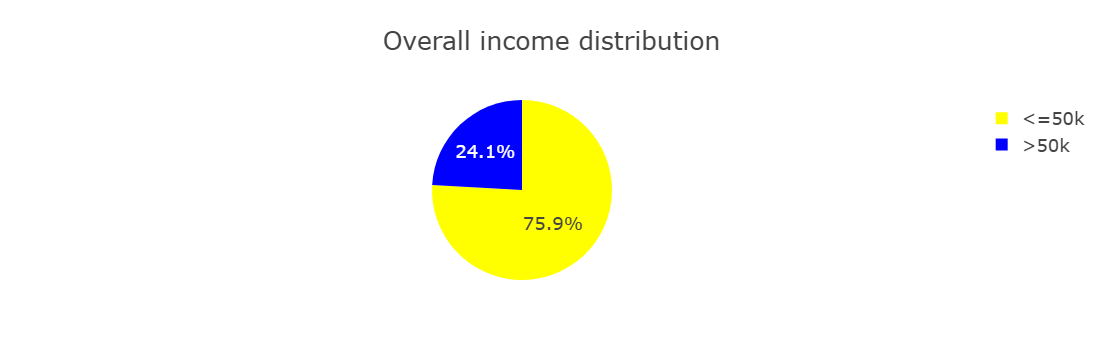

WARNING	Thread(Thread-5 (run)) Task(Task-8) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [20]:
fig = px.pie(
    adult_df_income,
    names='income',
    values='total',
    title='Overall income distribution',
    color_discrete_sequence=["yellow", "blue"]
)

fig.update_layout(
    template="presentation",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_pie_chart.html'))


### Income by Age Group

In [22]:
adult_df_income_age= adult_df.groupby(['age_group','income']).size().reset_index(name='total_by_age').sort_values(['age_group','income'],ascending=True)
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [23]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age'] / total_per_group * 100).round(2)
adult_df_income_age['percentage']                             

0      97.91
1       2.09
2      81.28
3      18.72
4      65.37
5      34.63
6      61.46
7      38.54
8      75.56
9      24.44
10     83.33
11     16.67
12    100.00
Name: percentage, dtype: float64

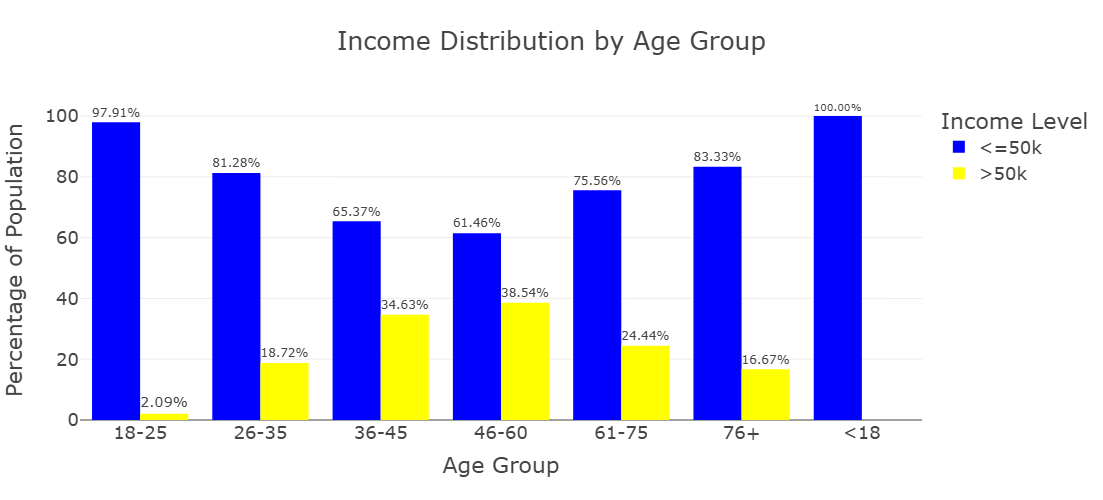

WARNING	Thread(Thread-9 (run)) Task(Task-84) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [24]:
fig = px.bar(adult_df_income_age, 
             x='age_group',
             y='percentage',
             color='income',
             title='Income Distribution by Age Group',
             barmode='group',
             height=500,
             color_discrete_sequence=["blue", "yellow"],
             text='percentage'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside') 

fig.update_layout(
    template="presentation",
    xaxis_title='Age Group',
    yaxis_title='Percentage of Population',
    legend_title_text='Income Level',
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_agegroup_bar_plot.html'))



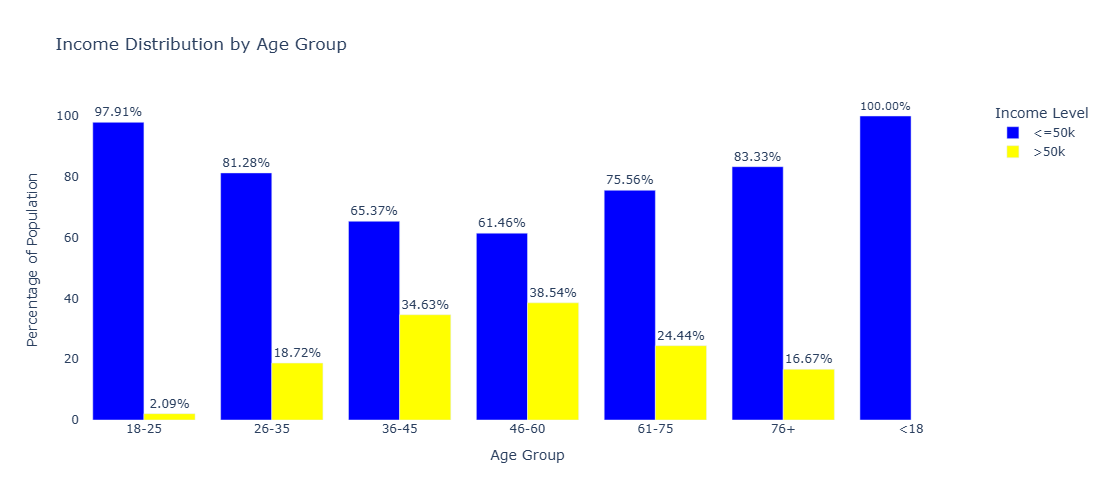

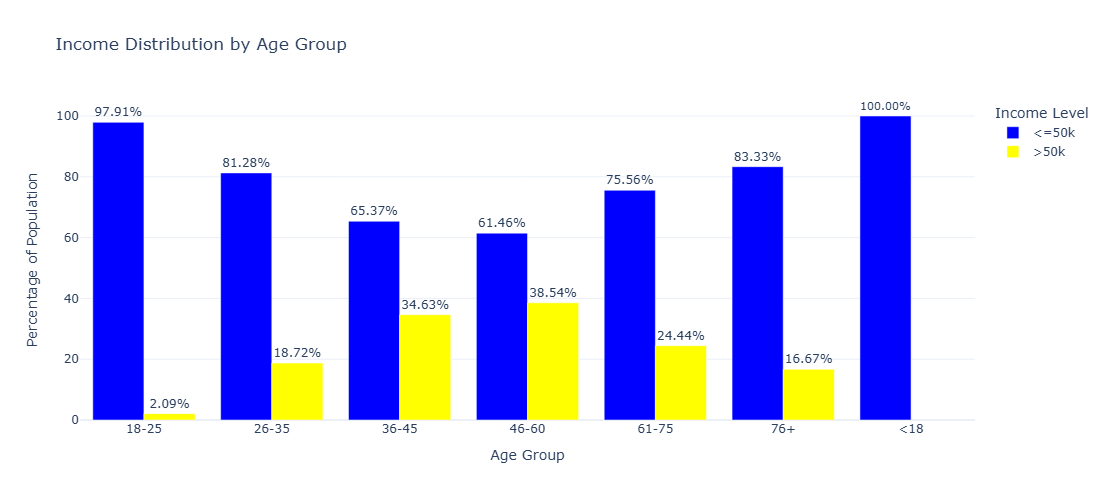

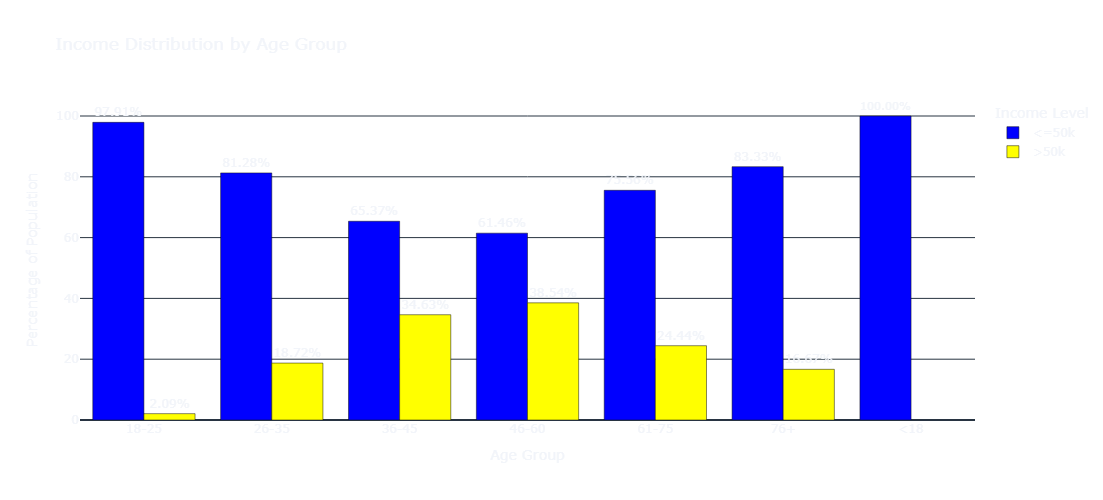

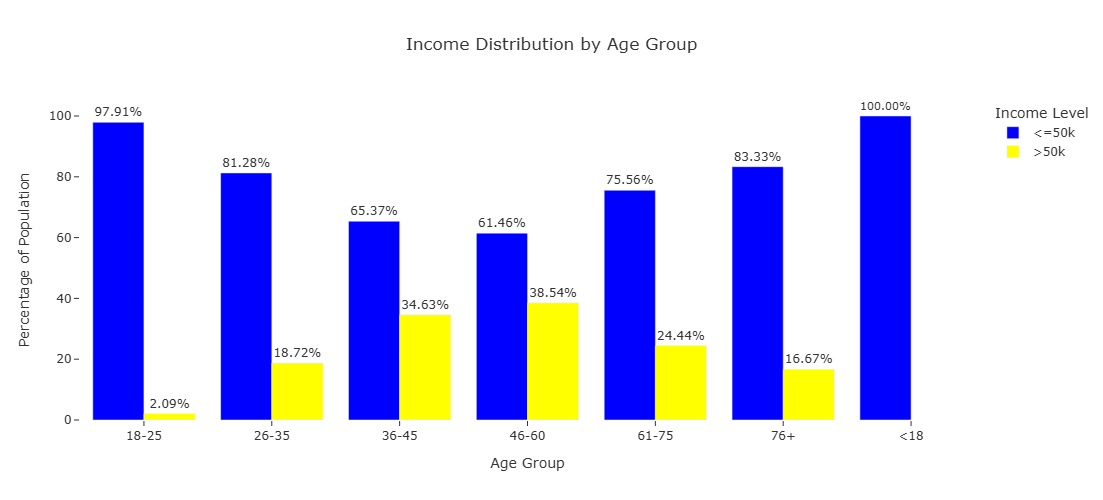

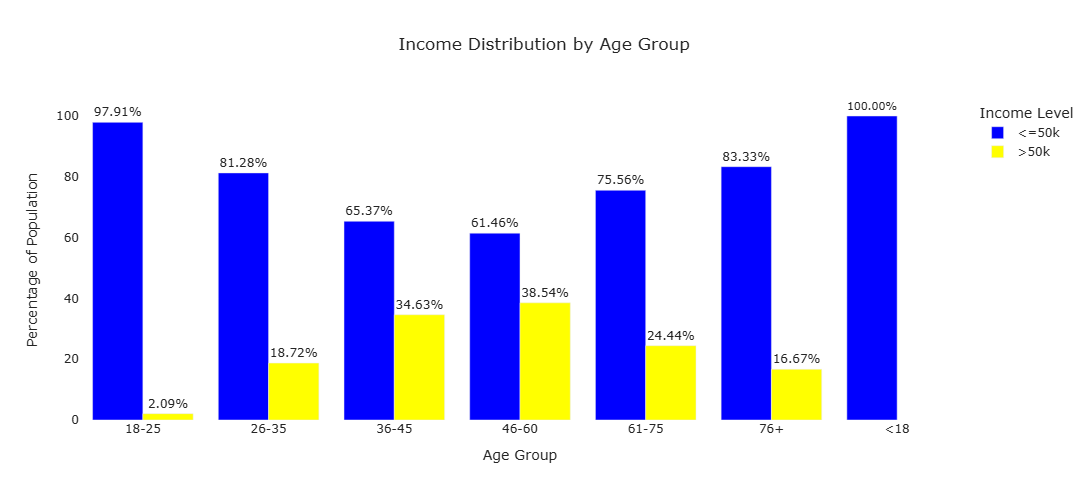

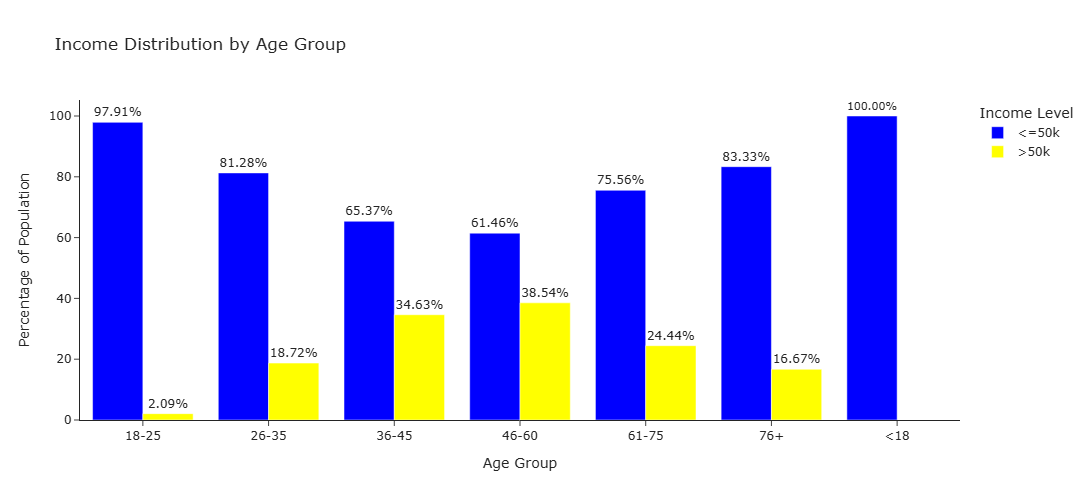

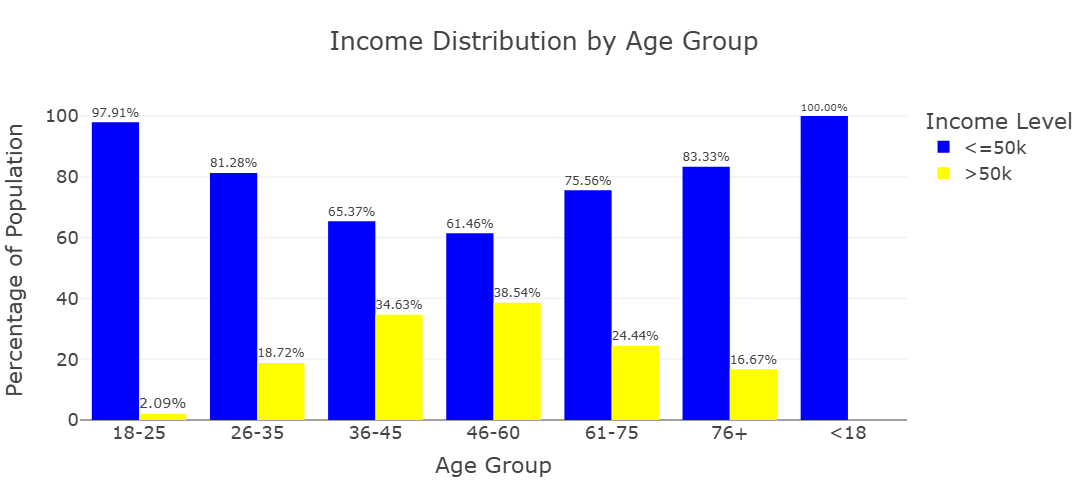

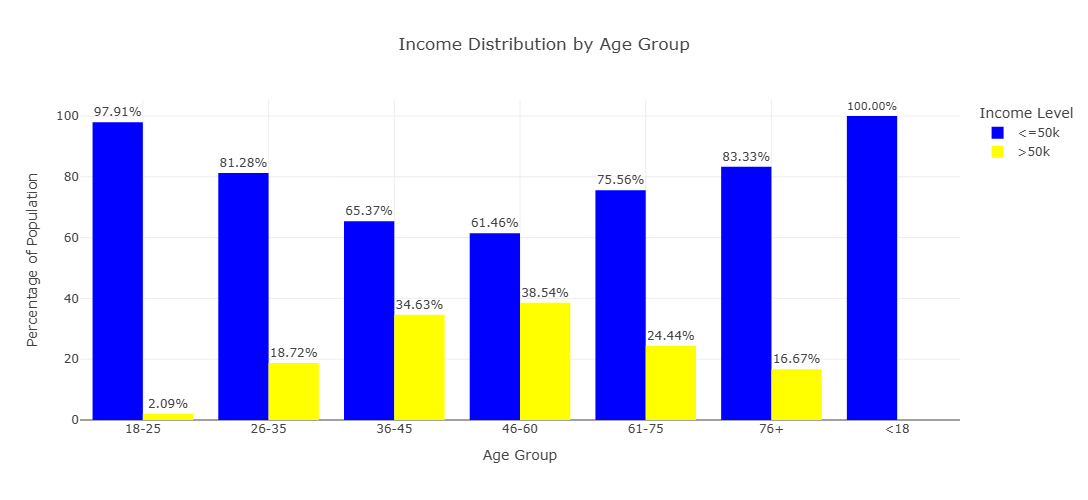

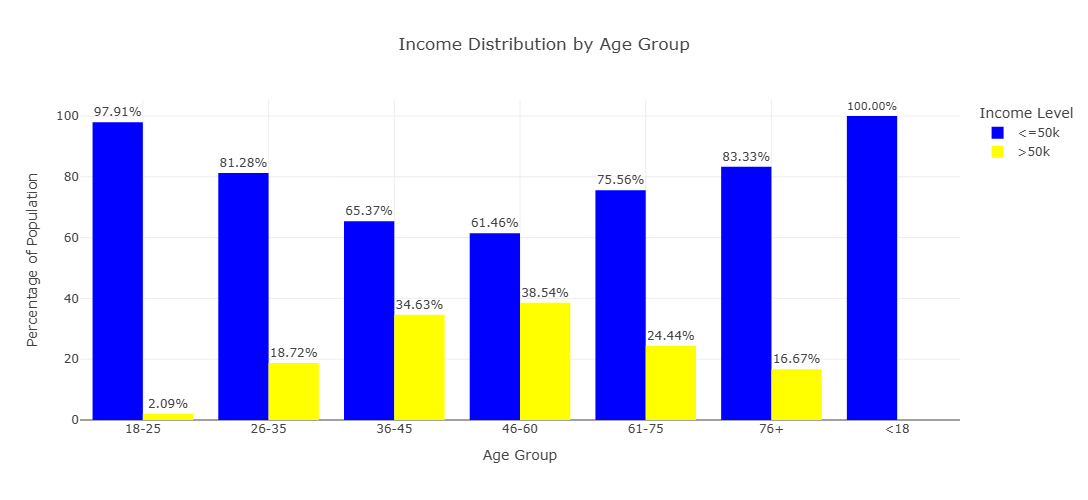

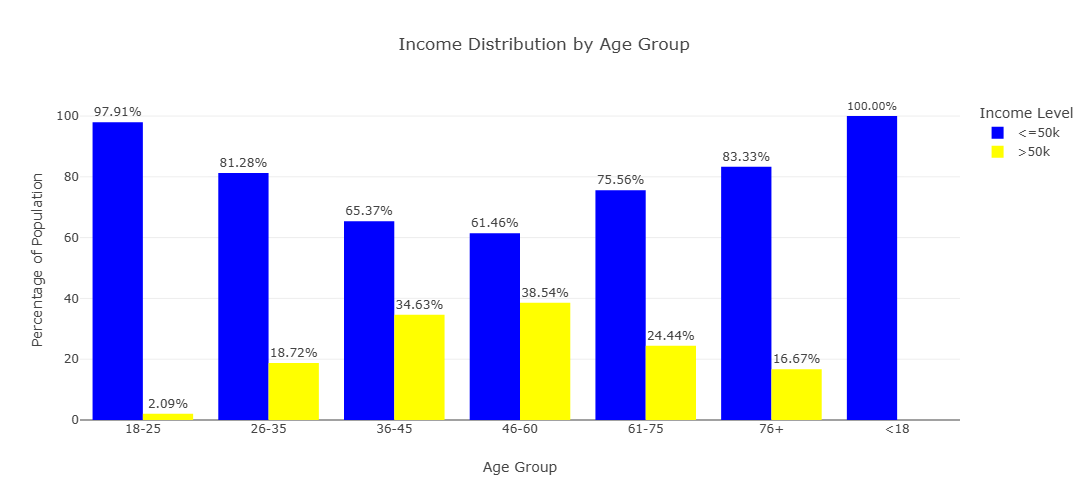

In [26]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", 
          "simple_white", "presentation", "gridon", "gridon", "none"]
          

for theme in themes: 
    fig.update_layout(template=theme)
    fig.show()

### Income by Native region

In [30]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central_america,<=50k,466
3,central_america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north_america,<=50k,22768
7,north_america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [32]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central_america,<=50k,466,88.931298
3,central_america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north_america,<=50k,22768,75.847825
7,north_america,>50k,7250,24.152175
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


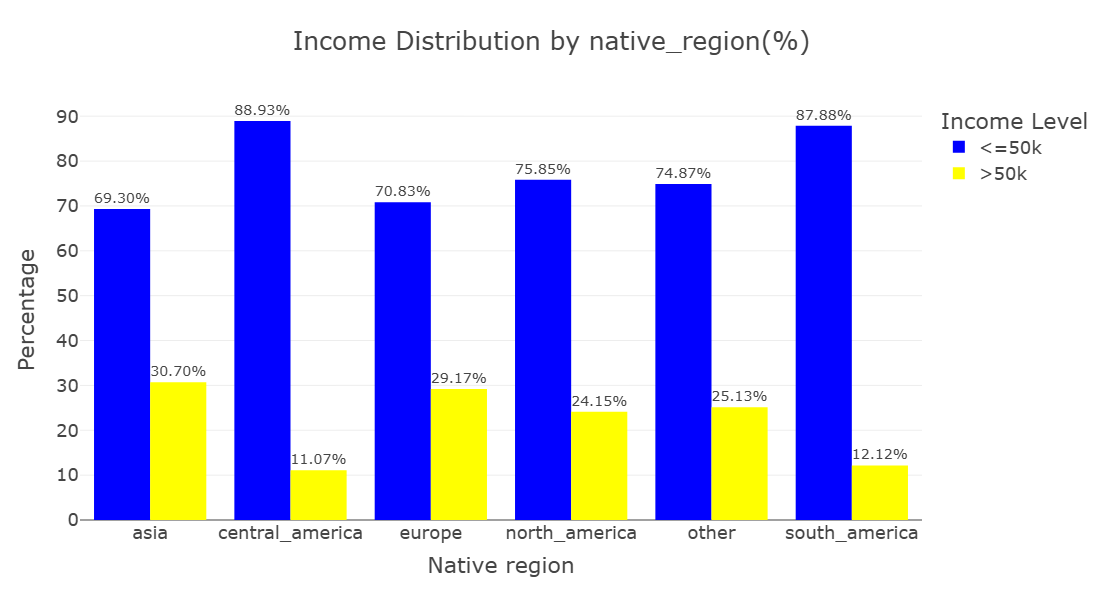

WARNING	Thread(Thread-13 (run)) Task(Task-157) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.
WARNING	Thread(Thread-15 (run)) Task(Task-194) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [34]:
fig = px.bar(
    adult_df_income_native_region,
    x='native_region',
    y='percentage',
    color='income',
    title='Income Distribution by native_region(%)',
    barmode='group',
    color_discrete_sequence=["blue", "yellow"],
    text='percentage', 
    width=900,       
    height=600
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside') 

fig.update_layout(
    template="presentation",
    xaxis_title='Native region',
    yaxis_title='Percentage',
    legend_title_text='Income Level',
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'income_distribution_by_native_region_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_native_region_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_native_region_bar_plot.html'))


### Income by Race

In [35]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_race

,race,income,total_income_distr
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20659
9,white,>50k,7112


In [38]:
total_per_race = adult_df_income_race.groupby('race')['total_income_distr'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_income_distr']/total_per_race) * 100
adult_df_income_race

,race,income,total_income_distr,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


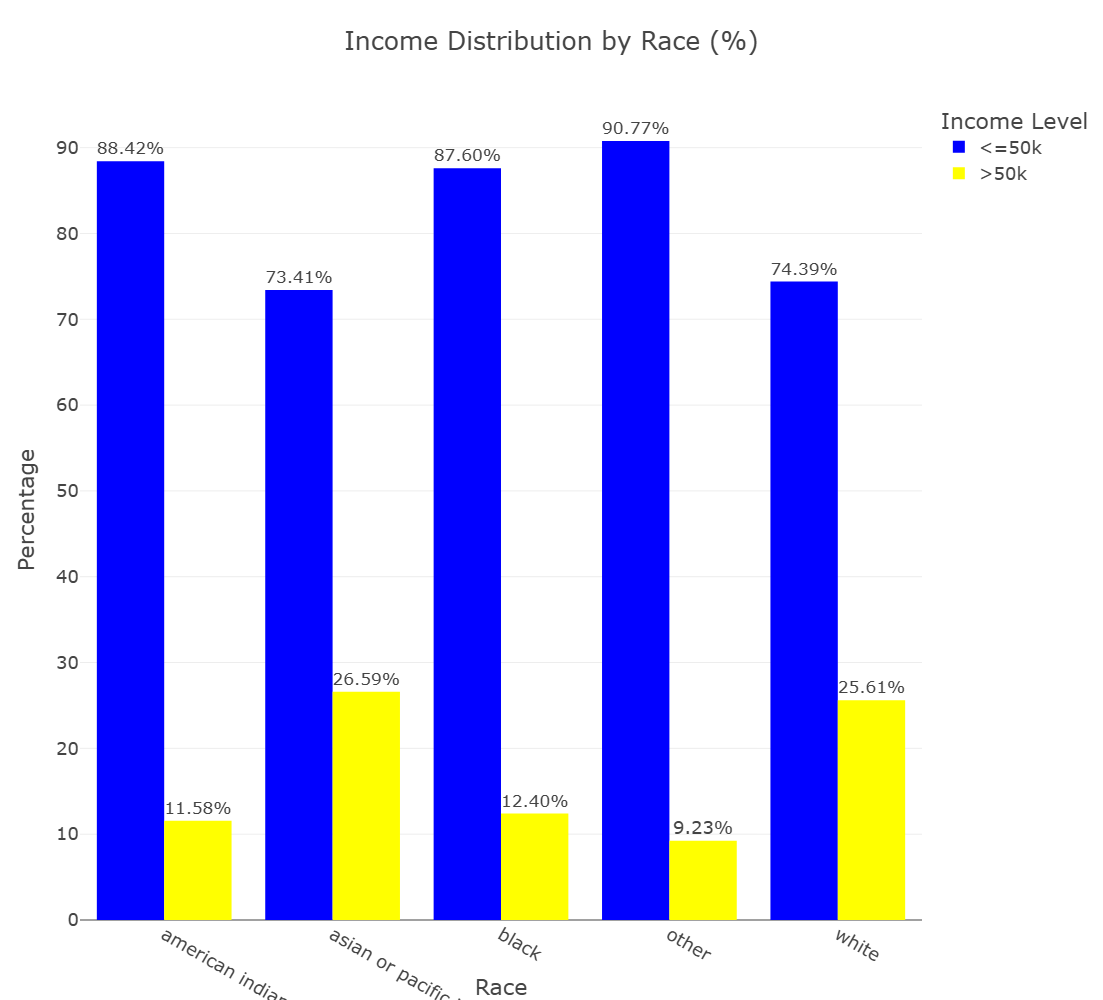

In [40]:
fig = px.bar(
    adult_df_income_race,
    x='race',
    y='percentage',
    color='income',
    title='Income Distribution by Race (%)',
    barmode='group',
    color_discrete_sequence=["blue", "yellow"],
    text='percentage',
    width=900,       
    height=1000       
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.update_layout(
    template="presentation",
    xaxis_title='Race',
    yaxis_title='Percentage',
    legend_title_text='Income Level',
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_race_bar_plot.html'))

In [41]:
adult_df_income_edu_occ = adult_df.groupby(['education_level', 'occupation_grouped','income']).size().reset_index(name='total').sort_values('total',ascending = False)
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
29,secondary-school graduate,blue collar,<=50k,3976
56,tertiary,white collar,>50k,3545
55,tertiary,white collar,<=50k,3369
45,some-college,white collar,<=50k,3003
36,secondary-school graduate,white collar,<=50k,2900
38,some-college,blue collar,<=50k,1503
32,secondary-school graduate,service,<=50k,1444
20,secondary,blue collar,<=50k,1349
6,associate,white collar,<=50k,1015
41,some-college,service,<=50k,902


In [ ]:
adult_df_income_edu_occ['edu_occ']=(adult_df_income_edu_occ['education_level']+"|")+adult_df_income_edu_occ['occupation_grouped']
adult_df_income_edu_occ

In [ ]:
adult_df_income_edu_occ.head(15)

In [28]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)

fig = px.bar(
    data_frame=adult_df_combos,
    x='total',
    y='edu_occ',
    color='income',
    orientation='h',
    title='Top 15 Education and Occupation Group Combinations by Income Group',
    barmode='group',
    color_discrete_sequence=["blue", "yellow"],
    text='total',
    width=700,
    height=900
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    template="presentation",
    xaxis_title='total',
    yaxis_title='edu_occ',
    legend_title_text='Income Level',
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Top 15 Education and Occupation Group Combinations by Income Group_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'Top 15 Education and Occupation Group Combinations by Income Group_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'Top 15 Education and Occupation Group Combinations by Income Group_bar_plot.html'))


NameError: name 'adult_df_income_edu_occ' is not defined